# Project 2 - Ames Housing Data

## Problem statement

We will be predicting the price of a house using a regression model with provided data set. 

## Data Import and Cleaning

In [1]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, Lasso
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
test = pd.read_csv('./datasets/test.csv')
df = pd.read_csv('./datasets/train.csv')


In [3]:
print(test.shape)
print(df.shape)

(879, 80)
(2051, 81)


In [4]:
display(test.head())
display(df.head())

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
df.dtypes

Id                  int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
                   ...   
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu

In [6]:
# Check if columns are similar if we drop sale price
list(test.columns) == list(df.drop('SalePrice', axis=1).columns)

True

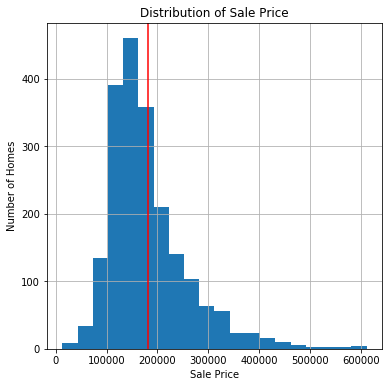

In [7]:
#shows that there is naturally some skew in our data, with 
df['SalePrice'].hist(figsize=(6,6), bins=20)
plt.xlabel("Sale Price")
plt.ylabel("Number of Homes")
plt.title('Distribution of Sale Price')
plt.axvline(np.mean(df['SalePrice']), c='r');

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


**Checking of NULL values for both sets**

In [9]:
#Checking for null values in the train set
df.isnull().sum().sort_values(ascending = False).head(25)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Cond        114
Garage Qual        114
Garage Yr Blt      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
Garage Area          1
Bsmt Unf SF          1
BsmtFin SF 2         1
Total Bsmt SF        1
dtype: int64

In [10]:
#Checking for null values in the test set
test.isnull().sum().sort_values(ascending = False).head(25)

Pool QC           875
Misc Feature      838
Alley             821
Fence             707
Fireplace Qu      422
Lot Frontage      160
Garage Cond        45
Garage Qual        45
Garage Yr Blt      45
Garage Finish      45
Garage Type        44
Bsmt Exposure      25
BsmtFin Type 1     25
Bsmt Qual          25
BsmtFin Type 2     25
Bsmt Cond          25
Mas Vnr Area        1
Mas Vnr Type        1
Electrical          1
Overall Cond        0
Exter Qual          0
Exter Cond          0
Foundation          0
Exterior 2nd        0
Exterior 1st        0
dtype: int64

In [11]:
#Change nominal data with numerical values to object
df['MS SubClass'] = df['MS SubClass'].astype(str)

## Numerical and Categorical Features

In [12]:
num_features = list(df._get_numeric_data())
print(len(num_features))

num_features_test = list(test._get_numeric_data())
print(len(num_features_test))

38
38


In [13]:
categorical_col = list(df.select_dtypes(include=['object']).columns)
print(len(categorical_col))

cat_col_test = list(test.select_dtypes(include=['object']).columns)
print(len(cat_col_test))

43
42


In [14]:
df[df['Lot Frontage'].isnull()].head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
23,12,527165230,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,185000
27,1534,909277040,50,RL,NaN,11700,Pave,Grvl,IR1,HLS,...,0,0,NaN,NaN,NaN,0,7,2008,WD,198000


**Filling of NA for categorical and 0 for numerical features**

In [15]:
#fillna with "NA" for categorical features and 0 for numerical features : Train
for col in df[categorical_col]:
    df[col] = df[col].fillna('NA')
    
for col in df[num_features]:
    df[col] = df[col].fillna(0)

    
#fillna with "NA" for categorical features and 0 for numerical features : Test
    
for col in test[cat_col_test]:
    test[col] = test[col].fillna('NA')
    
for col in df[num_features_test]:
    test[col] = test[col].fillna(0) 

**Change cordinal features to numerical**

In [16]:
# Change cordinal to numeric for common cordinal features. 
# eg: 'Exter Cond', 'Exter Qual', 'Bsmt Qual', 'Bsmt Cond' 
ordinal_dict = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'NA': 0}

# Change cordinal to numeric for Unique cordinal features. 
lotshape_dict = {'Reg': 4, 'IR1' : 3, 'IR2' : 2, 'IR3' : 1}
uti_dict = {'AllPub' : 4, 'NoSewr' : 3, 'NoSeWa': 2, 'ELO' : 1}
lslope_dict = {'Gtl': 3, 'Mod' : 2, 'Sev' : 1}
bsmtexp_dict = {'Gd': 4, 'Av' : 3, 'Mn' : 2, 'No': 1, 'NA' : 0}
bsmtfin_1_2_dict = {'GLQ': 6, 'ALQ' : 5, 'BLQ' : 4, 'Rec': 3, 'LwQ' : 2, 'Unf' : 1, 'NA': 0}

elec_dict = {'SBrkr': 4, 'FuseA' : 3, 'FuseF' : 2, 'FuseP': 1, 'Mix' : 0}
func_dict = {'Typ': 7, 'Min1': 6, 'Min2' : 5, 'Mod' : 4, 'Maj1': 3, 'Maj2' : 2, 'Sev' : 1, 'Sal': 0}
mafire_dict = {'Fa': 2, 'Po' : 1, 'NA' : 0}
garfin_dict = {'Fin' : 3, 'RFn' : 2, 'Unf': 1, 'NA' : 0}
fence_dict = {'GdPrv' : 4, 'MnPrv' : 3, 'GdWo': 2, 'MnWw' : 1, 'NA' : 0}

yn_dict = {'Y' : 1, 'N' : 0}
street_dict = {'Grvl': 0, 'Pave': 1}

#Duplicate Values, to replace by column
pavedr_dict = {'Y' : 2, 'P': 1, 'N' : 0}

In [17]:
# Change of nominal to ordinal: train
df.replace(ordinal_dict.keys(), ordinal_dict.values(), inplace=True)
df.replace(lotshape_dict.keys(), lotshape_dict.values(), inplace=True)

df.replace(uti_dict.keys(), uti_dict.values(), inplace=True)
df.replace(lslope_dict.keys(), lslope_dict.values(), inplace=True)
df.replace(bsmtexp_dict.keys(), bsmtexp_dict.values(), inplace=True)
df.replace(bsmtfin_1_2_dict.keys(), bsmtfin_1_2_dict.values(), inplace=True)

df.replace(elec_dict.keys(), elec_dict.values(), inplace=True)
df.replace(func_dict.keys(), func_dict.values(), inplace=True)
df.replace(mafire_dict.keys(), mafire_dict.values(), inplace=True)
df.replace(garfin_dict.keys(), garfin_dict.values(), inplace=True)
df.replace(fence_dict.keys(), fence_dict.values(), inplace=True)
df.replace(yn_dict.keys(), yn_dict.values(), inplace=True)
df.replace(garfin_dict.keys(), garfin_dict.values(), inplace=True)
df['Paved Drive'].replace(pavedr_dict.keys(), pavedr_dict.values(), inplace=True)

df['Paved Drive'] = df['Paved Drive'].astype(int)

In [18]:
# Change of nominal to ordinal: test
test.replace(ordinal_dict.keys(), ordinal_dict.values(), inplace=True)
test.replace(lotshape_dict.keys(), lotshape_dict.values(), inplace=True)

test.replace(uti_dict.keys(), uti_dict.values(), inplace=True)
test.replace(lslope_dict.keys(), lslope_dict.values(), inplace=True)
test.replace(bsmtexp_dict.keys(), bsmtexp_dict.values(), inplace=True)
test.replace(bsmtfin_1_2_dict.keys(), bsmtfin_1_2_dict.values(), inplace=True)

test.replace(elec_dict.keys(), elec_dict.values(), inplace=True)
test.replace(func_dict.keys(), func_dict.values(), inplace=True)
test.replace(mafire_dict.keys(), mafire_dict.values(), inplace=True)
test.replace(garfin_dict.keys(), garfin_dict.values(), inplace=True)
test.replace(fence_dict.keys(), fence_dict.values(), inplace=True)
test.replace(yn_dict.keys(), yn_dict.values(), inplace=True)
test.replace(garfin_dict.keys(), garfin_dict.values(), inplace=True)
test['Paved Drive'].replace(pavedr_dict.keys(), pavedr_dict.values(), inplace=True)

test['Paved Drive'] = test['Paved Drive'].astype(int)

In [19]:
df.dtypes

Id                  int64
PID                 int64
MS SubClass        object
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape           int64
Land Contour       object
Utilities           int64
Lot Config         object
Land Slope          int64
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual          int64
Exter Cond          int64
                   ...   
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual        int64
TotRms AbvGrd       int64
Functional          int64
Fireplaces          int64
Fireplace Qu

**Checking the correlation via Heatmap**

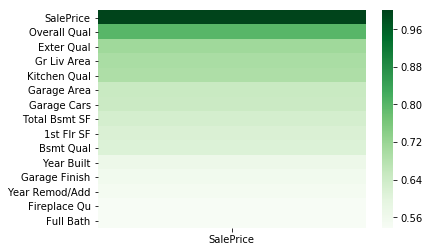

In [20]:
# create heatmap of top correlations
top_corr = np.abs(df.corr()[['SalePrice']]).sort_values('SalePrice', ascending=False)
sns.heatmap(top_corr.head(15), cmap='Greens');


**Combining of features that shares similar attributes**

In [21]:
# To drop Total Bsmt, 1st flr, 2nd flr, grd liv area
# to drop total bsmt sf, 1st flr , 2nd flr and grv liv area 
def add_totalSF(df):
    df['TotalSF'] = df['Total Bsmt SF']  + df['1st Flr SF'] + df['2nd Flr SF'] + df['Gr Liv Area']

add_totalSF(df)
add_totalSF(test)

In [22]:
# Convert time metrics, data is as of 2010
# To drop year built, year sold, Year remod/add
def houseage(df):
    df['age_at_sale'] = 2010 - df['Year Built']
    df['remodel_age'] = 2010 - df['Yr Sold'] 
houseage(df)
houseage(test)

## Feature selection

**Drop features with low correlations based initial overfitting with lasso.**

In [23]:
# Drop cols with low correlations based on first round of lasso.
# Created Total SF and drop Total Bsmt SF','1st Flr SF', '2nd Flr SF', 'Bsmt Unf SF','Gr Liv Area'
# Created house_age, drop Year built & year sold
# drop features wil low variance
drop_cols = ['Misc Feature', 'Misc Val', 'Mo Sold', "PID", 'MS Zoning', 'MS SubClass', 'Condition 1',
            'Condition 2', 'Neighborhood', 'Alley', 'Street', 'Roof Style', 'Mas Vnr Type', 'PID', 
            'Total Bsmt SF','1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Year Built', 'Yr Sold',
            'Year Remod/Add', 'Kitchen AbvGr', 'Pool QC','Land Slope', 'Bsmt Half Bath', 'Half Bath', 
            'Bsmt Full Bath', 'Full Bath', 'Garage Yr Blt']
df = df.drop(drop_cols, axis=1)
test = test.drop(drop_cols, axis=1)

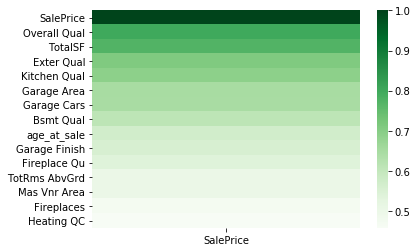

In [24]:
# create heatmap of top correlations after first layer of feature selection 
top_corr = np.abs(df.corr()[['SalePrice']]).sort_values('SalePrice', ascending=False)
sns.heatmap(top_corr.head(15), cmap='Greens');

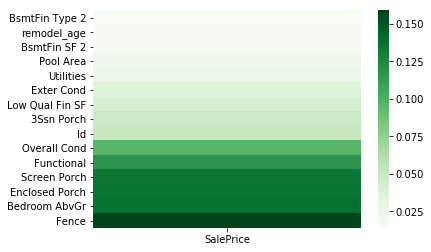

In [25]:
# create heatmap of least correlations
low_corr = np.abs(df.corr()[['SalePrice']]).sort_values('SalePrice', ascending=True)
sns.heatmap(low_corr.head(15), cmap='Greens');


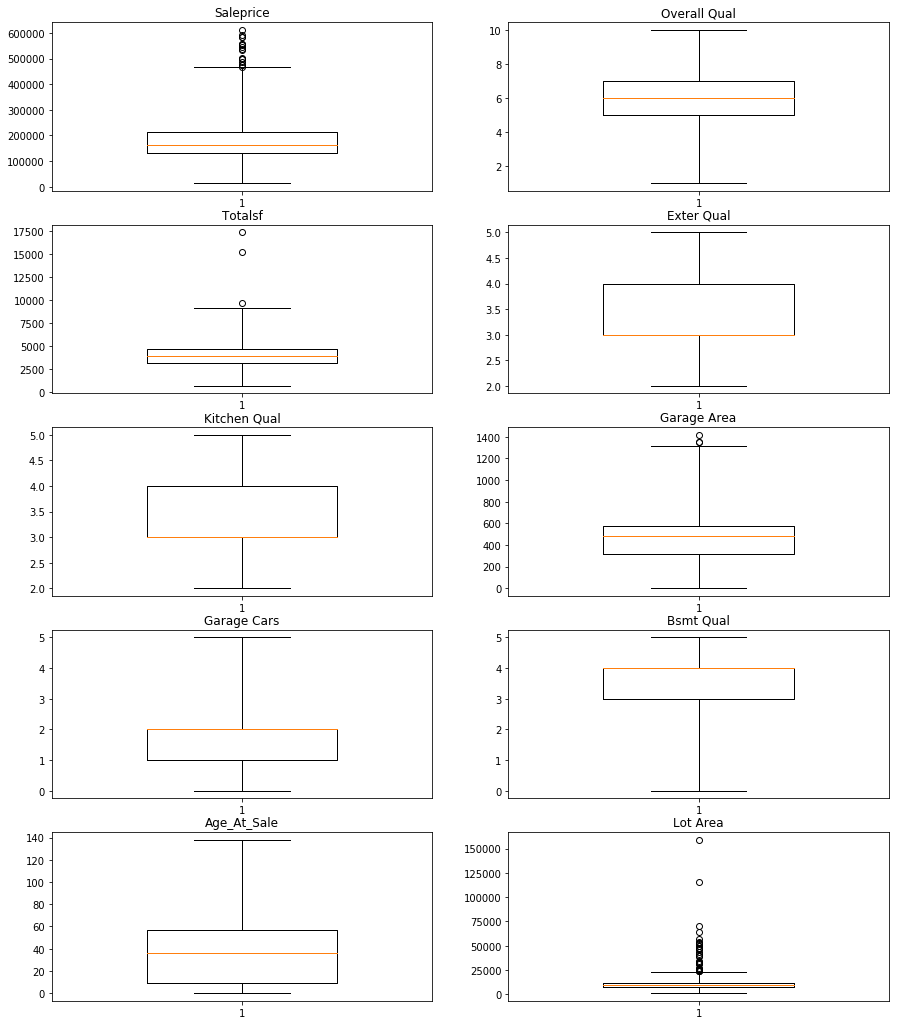

In [26]:
# Create box plots for high correlation variables

boxlist = ['SalePrice','Overall Qual', 'TotalSF', 'Exter Qual', 'Kitchen Qual','Garage Area', 'Garage Cars', 'Bsmt Qual',
          'age_at_sale', 'Lot Area']

fig, ax = plt.subplots(5,2,figsize=(15, 18))
ax=ax.ravel()

for i, col in enumerate(boxlist): 
    ax[i].boxplot(df[col], widths=[0.5], whis=3)
    ax[i].set_title(col.title(),fontsize=12)

**Cleaning Outliers**

In [27]:
#Sale Price
df.sort_values('SalePrice',ascending=False)[:12]

,Id,Lot Frontage,Lot Area,Lot Shape,Land Contour,Utilities,Lot Config,Bldg Type,House Style,Overall Qual,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Sale Type,SalePrice,TotalSF,age_at_sale,remodel_age
1671,45,100.0,12919,3,Lvl,4,Inside,1Fam,1Story,9,...,0,0,0,0,0,New,611657,7058.0,1,0
1964,1638,52.0,51974,3,Lvl,4,CulDSac,1Fam,1Story,9,...,0,0,322,0,0,New,591587,7336.0,4,3
1692,2451,114.0,17242,3,Lvl,4,Inside,1Fam,2Story,9,...,0,0,210,0,0,WD,584500,8733.0,17,4
1796,434,107.0,13891,4,Lvl,4,Inside,1Fam,2Story,9,...,0,0,192,0,0,New,582933,7378.0,2,1
151,2333,85.0,16056,3,Lvl,4,Inside,1Fam,2Story,9,...,0,0,0,0,0,New,556581,7728.0,5,4
1164,424,105.0,15431,4,Lvl,4,Inside,1Fam,1Story,10,...,0,0,170,0,0,WD,555000,7898.0,2,1
623,457,100.0,14836,3,HLS,4,Inside,1Fam,1Story,10,...,0,0,0,0,0,WD,552000,7476.0,6,1
138,2331,60.0,18062,3,HLS,4,CulDSac,1Fam,2Story,10,...,0,0,0,0,0,New,545224,8308.0,4,4
823,16,47.0,53504,2,HLS,4,CulDSac,1Fam,2Story,8,...,0,0,210,0,0,WD,538000,8208.0,7,0
1592,2335,82.0,16052,3,Lvl,4,CulDSac,1Fam,2Story,10,...,0,0,0,0,0,New,535000,7246.0,4,4


In [28]:
df['SalePrice'][:12]

0     130500
1     220000
2     109000
3     174000
4     138500
5     190000
6     140000
7     142000
8     112500
9     135000
10     85400
11    183600
Name: SalePrice, dtype: int64

In [29]:
#Total SF
df[df['TotalSF']>=10000]

,Id,Lot Frontage,Lot Area,Lot Shape,Land Contour,Utilities,Lot Config,Bldg Type,House Style,Overall Qual,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Sale Type,SalePrice,TotalSF,age_at_sale,remodel_age
960,1499,313.0,63887,1,Bnk,4,Corner,1Fam,2Story,10,...,0,0,0,480,0,New,160000,17394.0,2,2
1885,2181,128.0,39290,3,Bnk,4,Inside,1Fam,1Story,10,...,0,0,0,0,0,New,183850,15285.0,2,3


In [30]:
df.drop(df[df['TotalSF']>=10000].index,inplace=True)

In [31]:
#Lot Area
df[df['Lot Area']>60000]

,Id,Lot Frontage,Lot Area,Lot Shape,Land Contour,Utilities,Lot Config,Bldg Type,House Style,Overall Qual,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Sale Type,SalePrice,TotalSF,age_at_sale,remodel_age
471,2116,0.0,159000,2,Low,4,CulDSac,1Fam,1.5Fin,6,...,0,0,0,0,0,WD,277000,5732.0,52,3
694,2072,0.0,115149,2,Low,4,CulDSac,1Fam,1Story,7,...,0,0,0,0,0,WD,302000,5291.0,39,3
1854,2767,62.0,70761,3,Low,4,Inside,1Fam,1Story,7,...,0,0,0,0,0,WD,280000,4599.0,35,4


In [32]:
df.drop(df[df['Lot Area']>60000].index,inplace=True)

In [33]:
num_features = list(df._get_numeric_data())
print(len(num_features))

num_features_test = list(test._get_numeric_data())
print(len(num_features_test))

categorical_col = list(df.select_dtypes(include=['object']).columns)
print(len(categorical_col))

cat_col_test = list(test.select_dtypes(include=['object']).columns)
print(len(cat_col_test))


45
44
11
11


In [34]:
print(df.shape)
print(test.shape)

(2046, 56)
(879, 55)


In [35]:
dfcorr = df[num_features].corr()

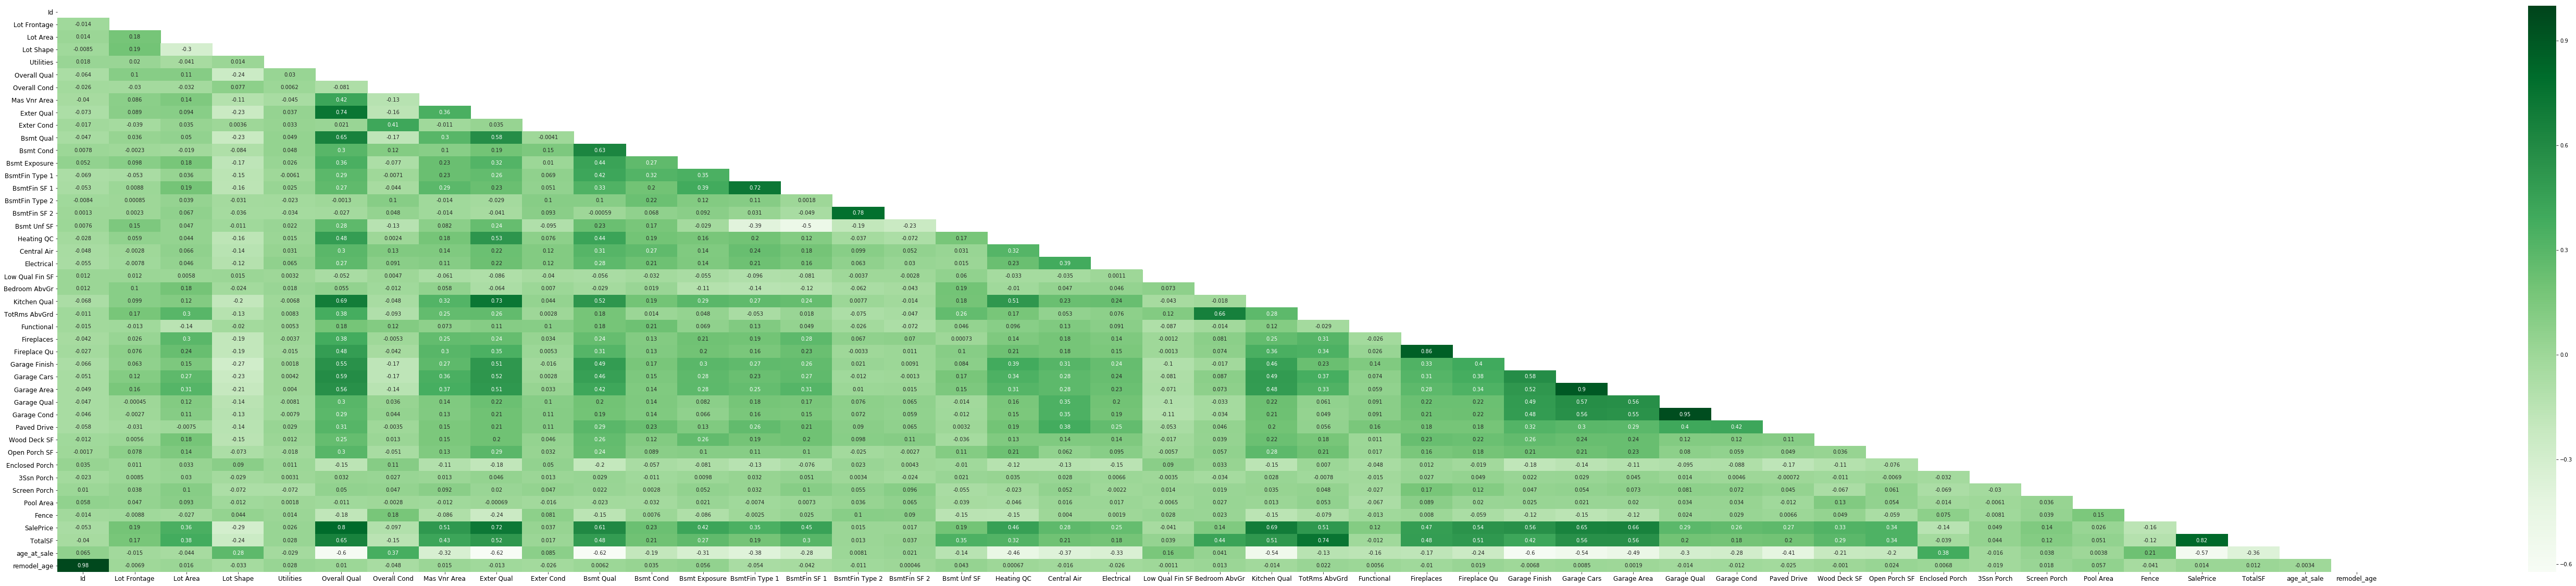

In [36]:
# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(100,20))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(dfcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(dfcorr, mask=mask, ax=ax, annot=True, cmap = 'Greens')

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [37]:
# Second layer Feature selection
abs(df[num_features].corr()['SalePrice'][:]).sort_values(ascending = True).head(30)

remodel_age        0.013590
BsmtFin Type 2     0.014618
BsmtFin SF 2       0.016986
Pool Area          0.025955
Utilities          0.026385
Exter Cond         0.036889
Low Qual Fin SF    0.041453
3Ssn Porch         0.048984
Id                 0.053436
Overall Cond       0.097350
Functional         0.118033
Enclosed Porch     0.135170
Screen Porch       0.135298
Bedroom AbvGr      0.138015
Fence              0.158446
Lot Frontage       0.188165
Bsmt Unf SF        0.190743
Bsmt Cond          0.225151
Electrical         0.247674
Garage Cond        0.264909
Paved Drive        0.273485
Central Air        0.277272
Garage Qual        0.285184
Lot Shape          0.293941
Wood Deck SF       0.326814
Open Porch SF      0.338509
BsmtFin Type 1     0.350232
Lot Area           0.357008
Bsmt Exposure      0.423921
BsmtFin SF 1       0.445121
Name: SalePrice, dtype: float64

In [38]:
drop_cols_2 = ['Functional', 'Heating QC','Low Qual Fin SF', 'Garage Area',
               'BsmtFin SF 2','Wood Deck SF', 'Garage Finish',
              'Bsmt Qual', 'Lot Frontage', 'Enclosed Porch', 'Bedroom AbvGr']
df = df.drop(drop_cols_2, axis=1)
test = test.drop(drop_cols_2, axis=1)

In [39]:
print(df.shape)
print(test.shape)

(2046, 45)
(879, 44)


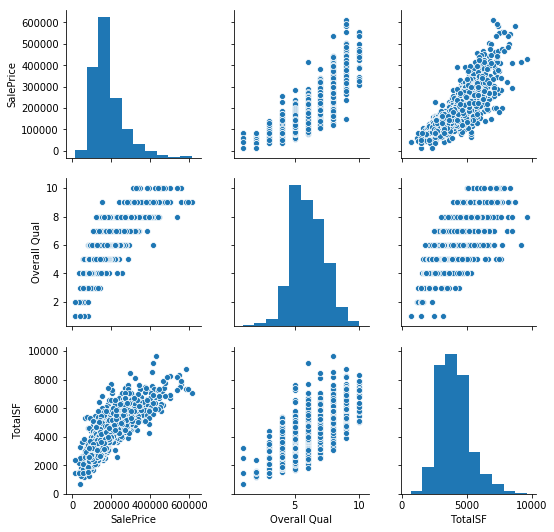

In [61]:
sns.pairplot(df[boxlist[:3]]);

In [41]:
num_features = list(df._get_numeric_data())
print(len(num_features))

num_features_test = list(test._get_numeric_data())
print(len(num_features_test))

categorical_col = list(df.select_dtypes(include=['object']).columns)
print(len(categorical_col))

cat_col_test = list(test.select_dtypes(include=['object']).columns)
print(len(cat_col_test))

34
33
11
11


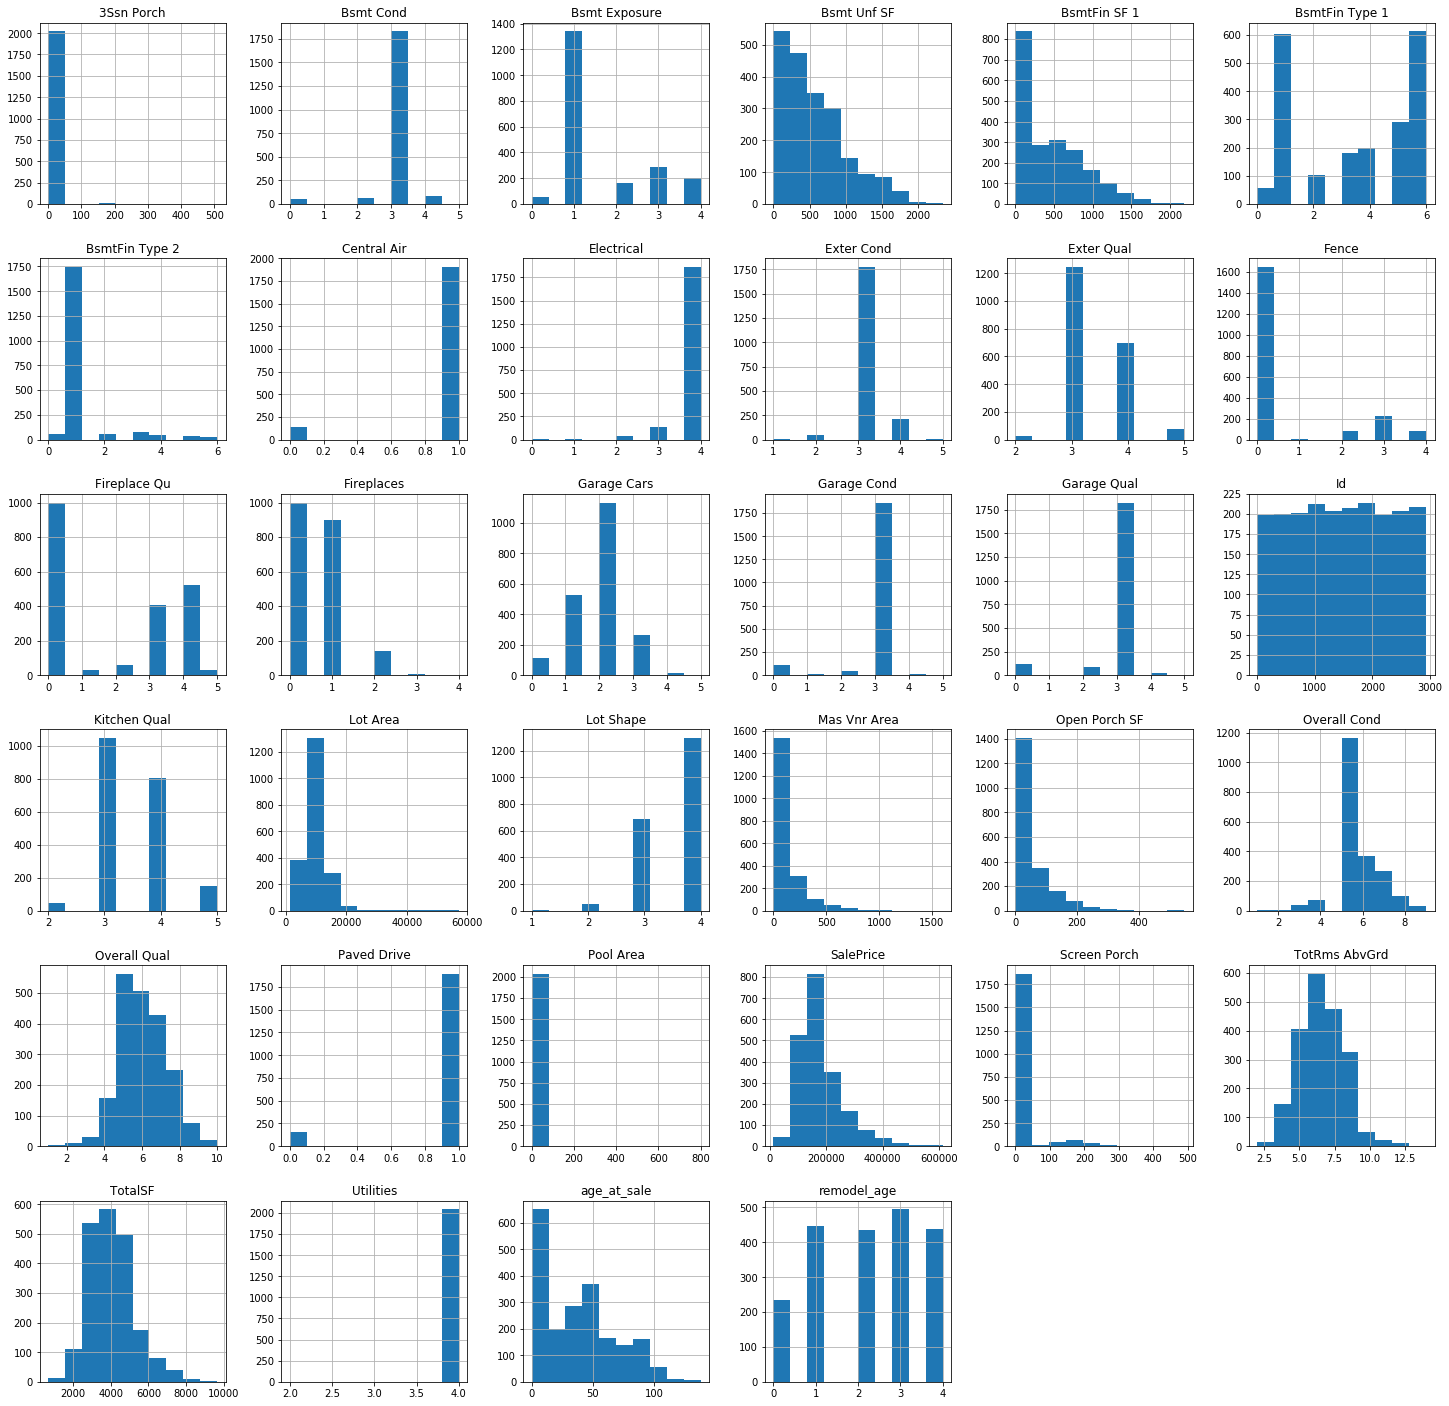

In [42]:
df[num_features].hist(figsize=(25, 25));

In [43]:
# get_dummies for train 
df = pd.get_dummies(df, columns= categorical_col, drop_first = True)

In [44]:
# get dummies for test
test = pd.get_dummies(test, columns= categorical_col, drop_first = True)

In [45]:
df.shape

(2046, 107)

In [46]:
test.shape

(879, 106)

In [47]:
# create list of features including new dummies
# Chose top 12 features, excluding ID, based on Lasso's top coef_

#features_model = [x for x in df.columns if x != 'SalePrice']
features_model = ['TotalSF', 'Overall Qual', 'BsmtFin SF 1', 'Exter Qual','age_at_sale', 'Sale Type_New',
                 'Mas Vnr Area', 'Kitchen Qual', 'Lot Area', 'Overall Cond','Id','Bsmt Exposure',
                    'Land Contour_HLS']


In [48]:
# Find missing columns in test
missing_cols = set(df.columns) - set(test.columns)
# Add a missing column in test with default value equal to 0
for c in missing_cols:
    test[c] = 0
# Ensure the order of columns in test is the same as in train
test = test[features_model]

## Model

### Train Test split

In [49]:
#Train test split

X = df[features_model]
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42, 
                                                    test_size=0.25)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1534, 13) (1534,)
(512, 13) (512,)


In [50]:
# cross-validation of train test split

lr = LinearRegression()
print(cross_val_score(lr, X_train, y_train, cv=3))
print(cross_val_score(lr, X_train, y_train, cv=3).mean())

[0.89155767 0.86611539 0.89286531]
0.8835127872114872


### Scale Data

In [51]:
#Standardize X_train and X_test using Standard Scaler

#Instantiate Standard Scaler
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
#Transform X_test
X_test_sc = ss.transform(X_test)
#Standardize Test
test_sc = ss.fit_transform(test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all con

## Lasso

In [52]:
# create linear model using Lasso
linear = LassoCV()
model = linear.fit(X_train_sc, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [53]:
#Train r2
model.score(X_train_sc, y_train)

0.8870972343029568

In [54]:
# Test r2
(model.score(X_test_sc, y_test))

0.8807120778945747

In [55]:
# find features with highest coefficients from Lasso

lasso_features = pd.DataFrame(X_train.columns, columns=['feature'])
lasso_features['coef'] = model.coef_
lasso_features['abs_coef'] = np.abs(model.coef_)
lasso_features.sort_values(by='abs_coef', ascending=False).head(12)                                   

,feature,coef,abs_coef
0,TotalSF,32368.682206,32368.682206
1,Overall Qual,16601.066862,16601.066862
3,Exter Qual,9436.271571,9436.271571
2,BsmtFin SF 1,9240.277261,9240.277261
7,Kitchen Qual,7616.163067,7616.163067
8,Lot Area,7495.521796,7495.521796
5,Sale Type_New,6925.044525,6925.044525
4,age_at_sale,-6780.992906,6780.992906
9,Overall Cond,5659.237826,5659.237826
6,Mas Vnr Area,5369.784439,5369.784439


## Predict Target values

In [56]:
y_pred = model.predict(test_sc)
y_pred.mean()

182146.40482398958

In [57]:
final = pd.DataFrame(y_pred, columns=['SalePrice'])
final['Id'] = test['Id']
final = final[['Id', 'SalePrice']]

In [58]:
final.head()

,Id,SalePrice
0,2658,158417.556312
1,2718,179300.402555
2,2414,235667.855002
3,1989,117189.580035
4,625,170221.383918


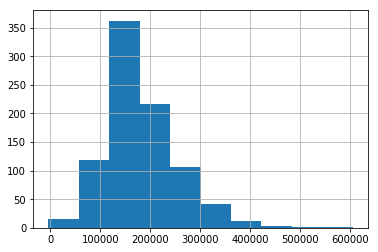

In [59]:
final['SalePrice'].hist();

In [60]:
final.to_csv('final2', index=False)